In [3]:
    ''' Root Cause Analysis of Franchise Sales Performance in a Coffee Franchise
1. Abstract

This project performs a comprehensive Root Cause Analysis (RCA) on a coffee franchise business to understand the reasons behind sales growth, stagnation, and decline across cities, outlets, managers, and product categories. Using Python-based data analytics, the study analyzes historical franchise data to identify high-performing and underperforming regions, managers, and products.

The project applies data cleaning, normalization, multi-metric scoring, statistical testing, and visualization techniques to uncover operational, managerial, and market-level factors influencing sales performance. The insights generated can help franchise owners improve profitability, optimize operations, and make data-driven expansion decisions.

2. Problem Statement

Despite having multiple outlets across different cities, the coffee franchise experiences uneven sales performance, including sudden sales hikes in some regions and consistent drops in others. Management lacks a structured analytical approach to identify:

Why certain cities outperform others

Why some franchises underperform despite similar resources

Whether managers, staffing, products, or customer satisfaction influence sales

Which factors drive revenue growth or decline

The absence of a data-driven RCA makes strategic decision-making inefficient and reactive rather than proactive.

3. Data Processing
3.1 Data Collection

Dataset sourced from franchise-level operational records (chai_sutta_bar(root cause analysis).csv)

Includes sales, growth, margin, staffing, customer rating, product, city, and manager-level attributes

3.2 Data Cleaning

Checked dataset structure using df.info()

Identified missing values using df.isnull().sum()

Removed duplicate franchise records using drop_duplicates()

Reset index to maintain consistency

Sorted records chronologically by Year_Opened

3.3 Exploratory Data Validation

Verified uniqueness of categorical variables (City, Product Category, Manager)

Counted unique values per column

Ensured logical consistency in sales, growth, and margin metrics

4. Data Modeling & Analytical Approach

Instead of predictive ML, this project uses descriptive + diagnostic analytics, ideal for Root Cause Analysis.

4.1 City-Level Performance Modeling

Aggregated metrics:

Total Sales

Average Franchise Margin

Average Revenue Growth

Normalized metrics using Min-Max Scaling

Created a Profit Score using weighted scoring:

Sales (40%)

Margin (30%)

Growth (30%)

Identified Top 5 and Bottom 5 cities

4.2 Manager-Level Performance Modeling

Evaluated managers based on:

Total Sales

Margin

Growth

Built a Manager Performance Score

Identified:

Top managers overall

Best manager in each top-performing city

4.3 Product-Level Root Cause Analysis

Grouped by Product Category

Analyzed:

Total Sales

Customer Rating

Daily Sales Units

Created Product Performance Score

Identified top-selling and underperforming products

4.4 Worst Franchise Identification

Designed a negative performance score using:

Low sales

Low growth

Low margin

High employee count

Ranked Top 10 worst-performing franchises

5. Existing Solution

Traditional franchise performance evaluation relies on:

Manual reports

Basic sales comparisons

Year-over-year revenue tracking

Limitations:

No normalization of metrics

No root cause identification

Ignores staffing inefficiency and manager impact

No statistical validation

Such methods fail to explain why sales rise or fall.

6. Proposed Solution (Your Code-Based Solution)

The proposed solution is an automated RCA framework built using Python that:

Cleans and structures raw franchise data

Normalizes key business metrics

Scores cities, managers, products, and franchises

Identifies root causes behind sales fluctuations

Uses statistical tests to validate findings

Visualizes insights for business stakeholders

This solution transforms raw data into actionable business intelligence.

7. Advantages of the Proposed Solution

Root Cause Focused – explains why performance changes

Multi-Dimensional Analysis – city, manager, product, staffing

Data-Driven Scoring Models – objective ranking

Scalable Framework – applicable to any franchise business

Decision-Oriented Insights – directly linked to actions

8. Key Insights & Root Causes Identified
Sales Drop Root Causes

Low daily sales units → poor footfall or pricing issues

High employees with low sales → operational inefficiency

Low margins → high operational costs or poor product mix

Poor product performance in certain cities

Revenue growth stagnation despite stable sales

Sales Growth Drivers

Efficient managers

Optimal staffing levels

High-performing product categories

Consistent revenue growth over years

9. Statistical Validation

Pearson Correlation:

No significant relationship between customer rating and total sales

ANOVA Test:

Significant sales difference across top cities

Chi-Square Test:

Product category influences revenue growth

These tests confirm that performance differences are statistically significant, not random.

10. Future Possibilities

Predict future franchise success using ML models

Real-time dashboard integration (Power BI / Tableau)

Geo-spatial expansion planning

Recommendation system for product mix per city

Staffing optimization models

11. References

Pandas Documentation

Scikit-learn Documentation

SciPy Statistical Methods

Business Analytics – Root Cause Analysis Models

Franchise Performance Benchmarking Studies
'''

<bound method DataFrame.info of                               Franchise_ID       City  Year_Opened  \
0     e9442f03-0dd1-41c5-8162-5e031cc9a13f     Indore         2017   
1     92c2f843-2b33-4309-b671-e1be5b3cf1eb      Delhi         2022   
2     5b22feb8-3a3b-47a7-8aad-baf6fd391569  Hyderabad         2022   
3     07c57608-15da-4f04-b57f-5f5c9b263228      Delhi         2017   
4     636ed6a6-acfe-4b3c-a0c0-bf1f811e9e06     Mumbai         2020   
...                                    ...        ...          ...   
1995  e00e4715-5a66-43ef-9e63-43aec2368a98     Indore         2021   
1996  79c3b6fe-8485-4c8c-b3da-38338d9087d6       Pune         2019   
1997  7f5372c9-e8a9-4189-8e52-4548523b6594     Ujjain         2021   
1998  0dbc82c1-a6d0-4964-b275-bc64d891c578       Pune         2018   
1999  2ed54c5a-bf4e-4253-906f-68da1269f547       Pune         2016   

     Product_Category  Daily_Sales_Units  Total_Sales (INR)  \
0         Masala Chai               1762           19814.92   
1

In [ ]:
#importing files
import pandas as pd
df=pd.read_csv('chai_sutta_bar(root cause analysis).csv')
df.info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Franchise_ID                        2000 non-null   object 
 1   City                                2000 non-null   object 
 2   Year_Opened                         2000 non-null   int64  
 3   Product_Category                    2000 non-null   object 
 4   Daily_Sales_Units                   2000 non-null   int64  
 5   Total_Sales (INR)                   2000 non-null   float64
 6   Total_Customers_Served              2000 non-null   int64  
 7   Customer_Visits (Daily)             2000 non-null   int64  
 8   Customer_Rating                     2000 non-null   float64
 9   Outlet_Manager                      2000 non-null   object 
 10  Total_Employees                     2000 non-null   int64  
 11  Global_Presence                     2000 no

In [6]:
df.isnull().sum()

Franchise_ID                          0
City                                  0
Year_Opened                           0
Product_Category                      0
Daily_Sales_Units                     0
Total_Sales (INR)                     0
Total_Customers_Served                0
Customer_Visits (Daily)               0
Customer_Rating                       0
Outlet_Manager                        0
Total_Employees                       0
Global_Presence                       0
Franchise_Margin_Percentage           0
Revenue_Growth_Percentage (Yearly)    0
Weekend_Sales (INR)                   0
dtype: int64

In [7]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"\nColumn: {col}")
    print(values)


Column: Franchise_ID
['e9442f03-0dd1-41c5-8162-5e031cc9a13f'
 '92c2f843-2b33-4309-b671-e1be5b3cf1eb'
 '5b22feb8-3a3b-47a7-8aad-baf6fd391569' ...
 '7f5372c9-e8a9-4189-8e52-4548523b6594'
 '0dbc82c1-a6d0-4964-b275-bc64d891c578'
 '2ed54c5a-bf4e-4253-906f-68da1269f547']

Column: City
['Indore' 'Delhi' 'Hyderabad' 'Mumbai' 'Pune' 'London' 'Chennai'
 'New York' 'Ujjain' 'Kolkata' 'Bhopal' 'Bangalore' 'Dubai']

Column: Year_Opened
[2017 2022 2020 2018 2021 2019 2016]

Column: Product_Category
['Masala Chai' 'Kulhad Chai' 'Coffee' 'Pan Chai' 'Other Snacks'
 'Chocolate Chai' 'Ginger Chai' 'Mint Chai']

Column: Daily_Sales_Units
[1762 3709  986 ... 1421 2673 2133]

Column: Total_Sales (INR)
[19814.92 88088.32 34102.9  ...  6198.77  9108.22 23061.92]

Column: Total_Customers_Served
[1924 3879 1188 ... 2187  613 1852]

Column: Customer_Visits (Daily)
[ 422 1681  101 ...  990  743 1104]

Column: Customer_Rating
[4.9 4.6 4.4 4.  3.8 3.7 4.1 4.7 4.3 3.6 4.5 4.8 3.9 4.2 5.  3.5]

Column: Outlet_Manage

In [8]:
df.sort_values(by="Year_Opened", ascending=True, inplace=True)
df.head(5)

,Franchise_ID,City,Year_Opened,Product_Category,Daily_Sales_Units,Total_Sales (INR),Total_Customers_Served,Customer_Visits (Daily),Customer_Rating,Outlet_Manager,Total_Employees,Global_Presence,Franchise_Margin_Percentage,Revenue_Growth_Percentage (Yearly),Weekend_Sales (INR)
1729,13d624f0-3948-4851-ada2-d2a838a36b19,Bangalore,2016,Coffee,218,8088.32,416,130,4.0,Ranbir Bala,13,Domestic,27.64,19.12,9442.57
331,7e35eec0-ed9c-4b43-8a33-4bfc77cbd1f2,Mumbai,2016,Ginger Chai,1450,22056.37,1587,1046,4.0,Tara Dutt,15,Domestic,36.80,4.21,25636.51
327,61434c58-d3d6-4616-a88d-f56b6d9a82d6,Indore,2016,Pan Chai,902,22053.06,1009,645,4.1,Sarthak Bajaj,10,Domestic,29.00,41.00,25549.89
322,df8d5200-e6d4-428d-93e2-ae242bc1beb0,Ujjain,2016,Other Snacks,725,30336.32,984,630,4.3,Imaran Tak,6,Domestic,34.92,49.52,35119.42
1719,e7ad1046-1a9e-48f7-a288-96c3c5bf2c35,Dubai,2016,Coffee,990,215872.79,1135,1111,4.9,Vritti Saxena,22,International,35.19,-4.33,256186.63


In [9]:
print(df.columns)

Index(['Franchise_ID', 'City', 'Year_Opened', 'Product_Category',
       'Daily_Sales_Units', 'Total_Sales (INR)', 'Total_Customers_Served',
       'Customer_Visits (Daily)', 'Customer_Rating', 'Outlet_Manager',
       'Total_Employees', 'Global_Presence', 'Franchise_Margin_Percentage',
       'Revenue_Growth_Percentage (Yearly)', 'Weekend_Sales (INR)'],
      dtype='object')


In [10]:
df_cleaned = df.drop_duplicates(keep='first')

In [11]:
df_cleaned

,Franchise_ID,City,Year_Opened,Product_Category,Daily_Sales_Units,Total_Sales (INR),Total_Customers_Served,Customer_Visits (Daily),Customer_Rating,Outlet_Manager,Total_Employees,Global_Presence,Franchise_Margin_Percentage,Revenue_Growth_Percentage (Yearly),Weekend_Sales (INR)
1729,13d624f0-3948-4851-ada2-d2a838a36b19,Bangalore,2016,Coffee,218,8088.32,416,130,4.0,Ranbir Bala,13,Domestic,27.64,19.12,9442.57
331,7e35eec0-ed9c-4b43-8a33-4bfc77cbd1f2,Mumbai,2016,Ginger Chai,1450,22056.37,1587,1046,4.0,Tara Dutt,15,Domestic,36.80,4.21,25636.51
327,61434c58-d3d6-4616-a88d-f56b6d9a82d6,Indore,2016,Pan Chai,902,22053.06,1009,645,4.1,Sarthak Bajaj,10,Domestic,29.00,41.00,25549.89
322,df8d5200-e6d4-428d-93e2-ae242bc1beb0,Ujjain,2016,Other Snacks,725,30336.32,984,630,4.3,Imaran Tak,6,Domestic,34.92,49.52,35119.42
1719,e7ad1046-1a9e-48f7-a288-96c3c5bf2c35,Dubai,2016,Coffee,990,215872.79,1135,1111,4.9,Vritti Saxena,22,International,35.19,-4.33,256186.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,52f6ac26-d4b4-4afd-a3d1-feb163c7b914,Mumbai,2022,Chocolate Chai,459,10012.64,553,254,4.5,Champak Bera,14,Domestic,23.43,13.45,12344.62
23,f2c8a415-edec-4e76-8407-a3b4ad21cde4,Indore,2022,Mint Chai,608,14476.25,809,573,3.9,Aishani Chaudry,8,Domestic,28.74,47.18,17901.05
1982,38487c7e-38db-4a70-b03d-e0693fdb7289,Kolkata,2022,Coffee,304,12724.45,578,424,3.6,Dalaja Garg,19,Domestic,21.49,32.30,15520.23
1978,405b9fb1-2e57-48e9-a0f7-d79dff5f8690,Bhopal,2022,Kulhad Chai,2780,52877.34,2902,2326,3.7,Xavier Arora,24,Domestic,31.25,26.07,62039.31


In [12]:
#cleaning data
df_cleaned = df_cleaned.reset_index(drop=True)

In [13]:
df_cleaned

,Franchise_ID,City,Year_Opened,Product_Category,Daily_Sales_Units,Total_Sales (INR),Total_Customers_Served,Customer_Visits (Daily),Customer_Rating,Outlet_Manager,Total_Employees,Global_Presence,Franchise_Margin_Percentage,Revenue_Growth_Percentage (Yearly),Weekend_Sales (INR)
0,13d624f0-3948-4851-ada2-d2a838a36b19,Bangalore,2016,Coffee,218,8088.32,416,130,4.0,Ranbir Bala,13,Domestic,27.64,19.12,9442.57
1,7e35eec0-ed9c-4b43-8a33-4bfc77cbd1f2,Mumbai,2016,Ginger Chai,1450,22056.37,1587,1046,4.0,Tara Dutt,15,Domestic,36.80,4.21,25636.51
2,61434c58-d3d6-4616-a88d-f56b6d9a82d6,Indore,2016,Pan Chai,902,22053.06,1009,645,4.1,Sarthak Bajaj,10,Domestic,29.00,41.00,25549.89
3,df8d5200-e6d4-428d-93e2-ae242bc1beb0,Ujjain,2016,Other Snacks,725,30336.32,984,630,4.3,Imaran Tak,6,Domestic,34.92,49.52,35119.42
4,e7ad1046-1a9e-48f7-a288-96c3c5bf2c35,Dubai,2016,Coffee,990,215872.79,1135,1111,4.9,Vritti Saxena,22,International,35.19,-4.33,256186.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,52f6ac26-d4b4-4afd-a3d1-feb163c7b914,Mumbai,2022,Chocolate Chai,459,10012.64,553,254,4.5,Champak Bera,14,Domestic,23.43,13.45,12344.62
1996,f2c8a415-edec-4e76-8407-a3b4ad21cde4,Indore,2022,Mint Chai,608,14476.25,809,573,3.9,Aishani Chaudry,8,Domestic,28.74,47.18,17901.05
1997,38487c7e-38db-4a70-b03d-e0693fdb7289,Kolkata,2022,Coffee,304,12724.45,578,424,3.6,Dalaja Garg,19,Domestic,21.49,32.30,15520.23
1998,405b9fb1-2e57-48e9-a0f7-d79dff5f8690,Bhopal,2022,Kulhad Chai,2780,52877.34,2902,2326,3.7,Xavier Arora,24,Domestic,31.25,26.07,62039.31


In [14]:
df.head(3)

,Franchise_ID,City,Year_Opened,Product_Category,Daily_Sales_Units,Total_Sales (INR),Total_Customers_Served,Customer_Visits (Daily),Customer_Rating,Outlet_Manager,Total_Employees,Global_Presence,Franchise_Margin_Percentage,Revenue_Growth_Percentage (Yearly),Weekend_Sales (INR)
1729,13d624f0-3948-4851-ada2-d2a838a36b19,Bangalore,2016,Coffee,218,8088.32,416,130,4.0,Ranbir Bala,13,Domestic,27.64,19.12,9442.57
331,7e35eec0-ed9c-4b43-8a33-4bfc77cbd1f2,Mumbai,2016,Ginger Chai,1450,22056.37,1587,1046,4.0,Tara Dutt,15,Domestic,36.80,4.21,25636.51
327,61434c58-d3d6-4616-a88d-f56b6d9a82d6,Indore,2016,Pan Chai,902,22053.06,1009,645,4.1,Sarthak Bajaj,10,Domestic,29.00,41.00,25549.89


In [15]:
unique_counts = df.nunique()

print(unique_counts)

Franchise_ID                          2000
City                                    13
Year_Opened                              7
Product_Category                         8
Daily_Sales_Units                     1326
Total_Sales (INR)                     2000
Total_Customers_Served                1338
Customer_Visits (Daily)               1113
Customer_Rating                         16
Outlet_Manager                        1986
Total_Employees                         26
Global_Presence                          2
Franchise_Margin_Percentage           1257
Revenue_Growth_Percentage (Yearly)    1691
Weekend_Sales (INR)                   2000
dtype: int64


In [16]:
# Count of franchises per city
franchise_count = df.groupby('City')['Franchise_ID'].nunique().reset_index()

franchise_count.rename(columns={'Franchise_ID': 'Number_of_Franchises'}, inplace=True)

print(franchise_count)

         City  Number_of_Franchises
0   Bangalore                   170
1      Bhopal                   161
2     Chennai                   144
3       Delhi                   153
4       Dubai                   134
5   Hyderabad                   142
6      Indore                   159
7     Kolkata                   158
8      London                   158
9      Mumbai                   157
10   New York                   151
11       Pune                   165
12     Ujjain                   148


In [17]:
city_summary = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum',                     # total business
    'Franchise_Margin_Percentage': 'mean',         # average margin %
    'Revenue_Growth_Percentage (Yearly)': 'mean'   # average revenue growth %
}).reset_index()

# Top 5 cities for each metric

#  Top 5 by Total_Sales (best business)
top_business = city_summary.sort_values(by='Total_Sales (INR)', ascending=False).head(5)

# Top 5 by Franchise_Margin_Percentage
top_margin = city_summary.sort_values(by='Franchise_Margin_Percentage', ascending=False).head(5)

# Top 5 by Revenue_Growth_Percentage (Yearly)
top_growth = city_summary.sort_values(by='Revenue_Growth_Percentage (Yearly)', ascending=False).head(5)

# Display results
print("Top 5 Cities by Total Sales (Best Business):")
print(top_business[['City', 'Total_Sales (INR)']])

print("\nTop 5 Cities by Franchise Margin Percentage:")
print(top_margin[['City', 'Franchise_Margin_Percentage']])

print("\nTop 5 Cities by Revenue Growth Percentage (Yearly):")
print(top_growth[['City', 'Revenue_Growth_Percentage (Yearly)']])

Top 5 Cities by Total Sales (Best Business):
         City  Total_Sales (INR)
8      London        67794312.85
10   New York        65509414.15
4       Dubai        19713158.05
0   Bangalore         5349649.37
11       Pune         5287809.33

Top 5 Cities by Franchise Margin Percentage:
        City  Franchise_Margin_Percentage
6     Indore                    30.599623
4      Dubai                    30.575448
7    Kolkata                    30.513734
0  Bangalore                    30.466118
9     Mumbai                    30.419172

Top 5 Cities by Revenue Growth Percentage (Yearly):
         City  Revenue_Growth_Percentage (Yearly)
11       Pune                           21.706848
0   Bangalore                           21.534118
10   New York                           20.022583
1      Bhopal                           19.629627
2     Chennai                           19.551597


In [18]:
city_summary = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum',                # total business
    'Franchise_Margin_Percentage': 'mean',     # average margin %
    'Revenue_Growth_Percentage (Yearly)': 'mean'  # average revenue growth %
}).reset_index()

# Step 2: Normalize each metric (0-1 scale) to combine fairly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

city_summary[['Total_Sales_Norm', 'Margin_Norm', 'Growth_Norm']] = scaler.fit_transform(
    city_summary[['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)']]
)

# Step 3: Calculate a combined score (you can tweak weights)
city_summary['Profit_Score'] = (
    0.4 * city_summary['Total_Sales_Norm'] + 
    0.3 * city_summary['Margin_Norm'] + 
    0.3 * city_summary['Growth_Norm']
)

# Step 4: Sort cities by score to get top 5
top_5_cities = city_summary.sort_values(by='Profit_Score', ascending=False).head(5)

print(top_5_cities[['City', 'Total_Sales (INR)', 'Franchise_Margin_Percentage', 
                    'Revenue_Growth_Percentage (Yearly)', 'Profit_Score']])

         City  Total_Sales (INR)  Franchise_Margin_Percentage  \
8      London        67794312.85                    30.042025   
10   New York        65509414.15                    29.667616   
0   Bangalore         5349649.37                    30.466118   
4       Dubai        19713158.05                    30.575448   
6      Indore         4671612.15                    30.599623   

    Revenue_Growth_Percentage (Yearly)  Profit_Score  
8                            18.984684      0.607445  
10                           20.022583      0.569145  
0                            21.534118      0.556137  
4                            19.497388      0.507922  
6                            19.333711      0.407471  


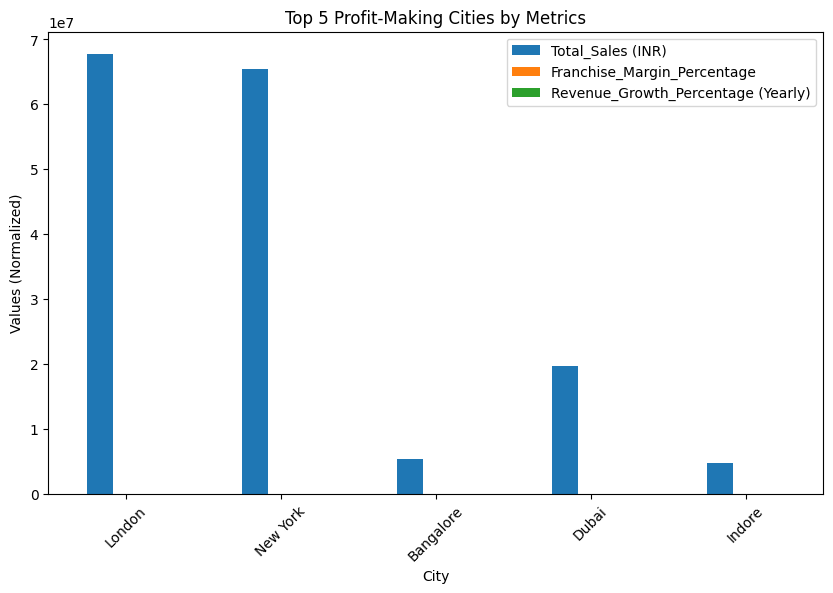

In [19]:
import matplotlib.pyplot as plt

top_5_cities.plot(x='City', y=['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)'], 
                  kind='bar', figsize=(10,6))
plt.title('Top 5 Profit-Making Cities by Metrics')
plt.ylabel('Values (Normalized)')
plt.xticks(rotation=45)
plt.show()


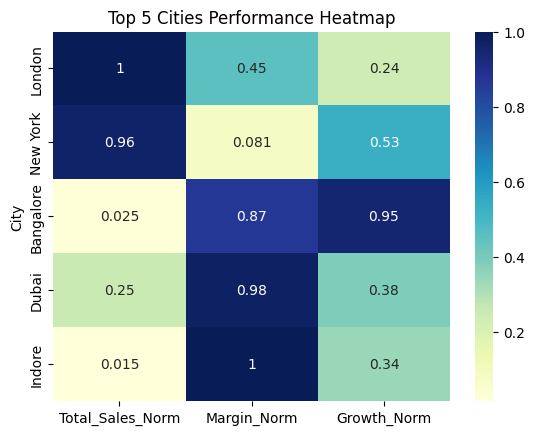

In [20]:
import seaborn as sns

sns.heatmap(top_5_cities[['Total_Sales_Norm','Margin_Norm','Growth_Norm']].set_index(top_5_cities['City']), 
            annot=True, cmap='YlGnBu')
plt.title('Top 5 Cities Performance Heatmap')
plt.show()


In [21]:
#To find top selling products
product_summary = df.groupby('Product_Category').agg({
    'Total_Sales (INR)': 'sum',           # total sales
    'Customer_Rating': 'mean',            # average rating
    'Daily_Sales_Units': 'sum'            # optional: total units sold
}).reset_index()

# Step 2: Normalize metrics for fair comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

product_summary[['Sales_Norm', 'Rating_Norm']] = scaler.fit_transform(
    product_summary[['Total_Sales (INR)', 'Customer_Rating']]
)

# Step 3: Calculate a combined score (weight can be adjusted)
product_summary['Performance_Score'] = 0.6 * product_summary['Sales_Norm'] + 0.4 * product_summary['Rating_Norm']

# Step 4: Sort products by score to get top performers
top_products = product_summary.sort_values(by='Performance_Score', ascending=False)

print(top_products[['Product_Category', 'Total_Sales (INR)', 'Customer_Rating', 'Performance_Score']])

  Product_Category  Total_Sales (INR)  Customer_Rating  Performance_Score
3      Kulhad Chai        51343891.46         4.265152           0.759765
4      Masala Chai        46047678.70         4.254348           0.631996
2      Ginger Chai        23026992.14         4.314019           0.600835
6     Other Snacks         8779645.66         4.292776           0.295568
1           Coffee        28450136.09         4.232653           0.277282
5        Mint Chai        13972396.03         4.258750           0.201493
7         Pan Chai        15585039.35         4.245113           0.157184
0   Chocolate Chai        12117407.61         4.243966           0.102663


In [22]:
#top 5 poorly performing cities
city_summary = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum',
    'Franchise_Margin_Percentage': 'mean',
    'Revenue_Growth_Percentage (Yearly)': 'mean'
}).reset_index()

# Sort by Total_Sales to find bottom 5
bottom_5_cities = city_summary.sort_values(by='Total_Sales (INR)', ascending=True).head(5)
print(bottom_5_cities)


         City  Total_Sales (INR)  Franchise_Margin_Percentage  \
12     Ujjain         3735024.49                    29.816284   
5   Hyderabad         4030196.32                    29.586761   
2     Chennai         4355504.88                    30.290000   
3       Delhi         4440499.04                    29.840261   
1      Bhopal         4590605.44                    29.982112   

    Revenue_Growth_Percentage (Yearly)  
12                           19.179324  
5                            19.458451  
2                            19.551597  
3                            19.516275  
1                            19.629627  


In [24]:
manager_summary = df.groupby('Outlet_Manager').agg({
    'Total_Sales (INR)': 'sum',                # total business
    'Franchise_Margin_Percentage': 'mean',     # average margin
    'Revenue_Growth_Percentage (Yearly)': 'mean'  # average growth
}).reset_index()

# Normalize metrics for scoring
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

manager_summary[['Sales_Norm', 'Margin_Norm', 'Growth_Norm']] = scaler.fit_transform(
    manager_summary[['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)']]
)

# Step 3: Calculate combined score (weights can be adjusted)
manager_summary['Performance_Score'] = (
    0.5 * manager_summary['Sales_Norm'] + 
    0.3 * manager_summary['Margin_Norm'] + 
    0.2 * manager_summary['Growth_Norm']
)

# Step 4: Sort managers by score to get top 2
top_2_managers = manager_summary.sort_values(by='Performance_Score', ascending=False).head(5)

print(top_2_managers[['Outlet_Manager', 'Total_Sales (INR)', 
                      'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)',
                      'Performance_Score']])

        Outlet_Manager  Total_Sales (INR)  Franchise_Margin_Percentage  \
799      Inaya Kapadia         1600222.87                        28.29   
1604  Tristan Banerjee         1130774.00                        39.50   
1938        Yutika Tak         1565428.13                        35.68   
134       Anjali Bajwa         1336898.43                        39.66   
609         Faris Dara          935974.81                        38.18   

      Revenue_Growth_Percentage (Yearly)  Performance_Score  
799                                45.74           0.810246  
1604                               29.64           0.778035  
1938                                3.71           0.770108  
134                                 2.40           0.754026  
609                                45.20           0.749202  


In [25]:
#top manager per city
from sklearn.preprocessing import MinMaxScaler


#  top 5 profit-making cities
city_summary = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum',
    'Franchise_Margin_Percentage': 'mean',
    'Revenue_Growth_Percentage (Yearly)': 'mean'
}).reset_index()

# Normalize metrics for fair scoring
scaler = MinMaxScaler()
city_summary[['Sales_Norm', 'Margin_Norm', 'Growth_Norm']] = scaler.fit_transform(
    city_summary[['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)']]
)

# Combined Profit Score for cities
city_summary['Profit_Score'] = (
    0.4 * city_summary['Sales_Norm'] +
    0.3 * city_summary['Margin_Norm'] +
    0.3 * city_summary['Growth_Norm']
)

# Top 5 cities
top_5_cities = city_summary.sort_values(by='Profit_Score', ascending=False).head(5)['City'].tolist()

# Find best manager in each of top 5 cities
best_managers = []

for city in top_5_cities:
    # Filter data for the city
    city_df = df[df['City'] == city]
    
    # Aggregate metrics per manager
    manager_summary = city_df.groupby('Outlet_Manager').agg({
        'Total_Sales (INR)': 'sum',
        'Franchise_Margin_Percentage': 'mean',
        'Revenue_Growth_Percentage (Yearly)': 'mean'
    }).reset_index()
    
    # Normalize metrics
    manager_summary[['Sales_Norm', 'Margin_Norm', 'Growth_Norm']] = scaler.fit_transform(
        manager_summary[['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)']]
    )
    
    # Performance Score for managers
    manager_summary['Performance_Score'] = (
        0.5 * manager_summary['Sales_Norm'] + 
        0.3 * manager_summary['Margin_Norm'] + 
        0.2 * manager_summary['Growth_Norm']
    )
    
    # Get top manager for the city
    top_manager = manager_summary.sort_values(by='Performance_Score', ascending=False).head(1)
    top_manager['City'] = city  # add city column
    best_managers.append(top_manager)

# Combine results for all cities
best_managers_df = pd.concat(best_managers, ignore_index=True)

# Display
print(best_managers_df[['City', 'Outlet_Manager', 'Total_Sales (INR)', 
                        'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)', 
                        'Performance_Score']])

        City Outlet_Manager  Total_Sales (INR)  Franchise_Margin_Percentage  \
0     London    Kalpit Loke         1358786.29                        30.46   
1   New York  Inaya Kapadia         1600222.87                        28.29   
2  Bangalore    Ishita Nagi          122551.38                        38.75   
3      Dubai   Arjun Pillai          518813.88                        31.85   
4     Indore   Rajata Soman          108768.87                        39.48   

   Revenue_Growth_Percentage (Yearly)  Performance_Score  
0                               28.63           0.739426  
1                               45.74           0.812140  
2                               48.30           0.945992  
3                               41.61           0.850779  
4                               30.31           0.909041  


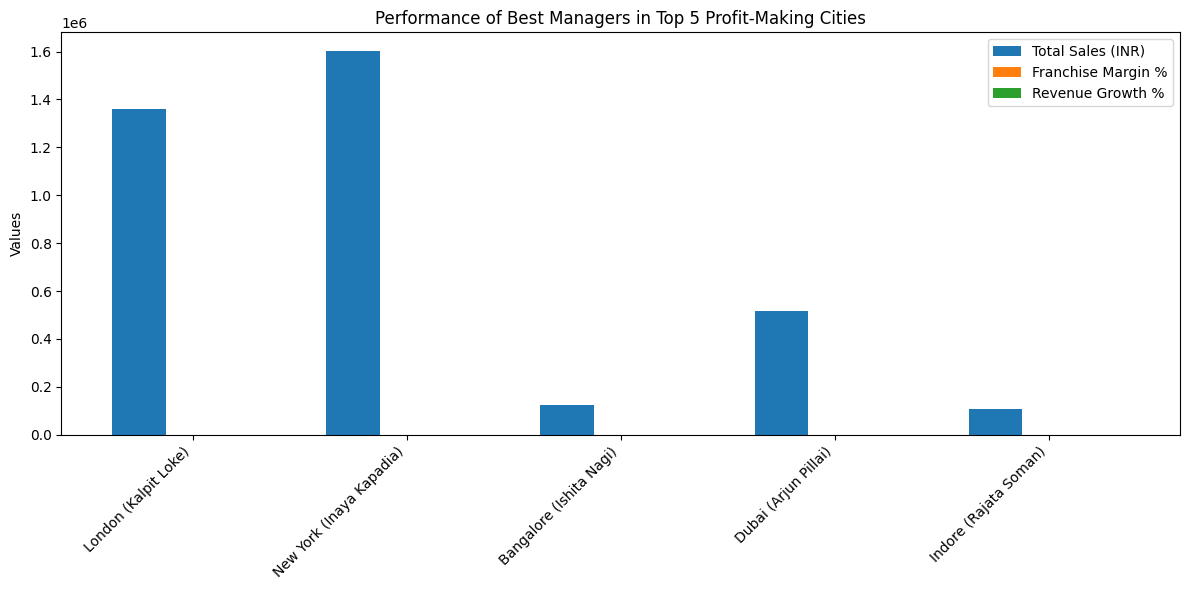

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


# Set the figure size
plt.figure(figsize=(12,6))

# Set positions for grouped bars
x = range(len(best_managers_df))
width = 0.25  # width of each bar

# Plot bars
plt.bar([p - width for p in x], best_managers_df['Total_Sales (INR)'], width=width, label='Total Sales (INR)')
plt.bar(x, best_managers_df['Franchise_Margin_Percentage'], width=width, label='Franchise Margin %')
plt.bar([p + width for p in x], best_managers_df['Revenue_Growth_Percentage (Yearly)'], width=width, label='Revenue Growth %')

# Labels and titles
plt.xticks(x, best_managers_df['City'] + " (" + best_managers_df['Outlet_Manager'] + ")", rotation=45, ha='right')
plt.ylabel('Values')
plt.title('Performance of Best Managers in Top 5 Profit-Making Cities')
plt.legend()
plt.tight_layout()
plt.show()


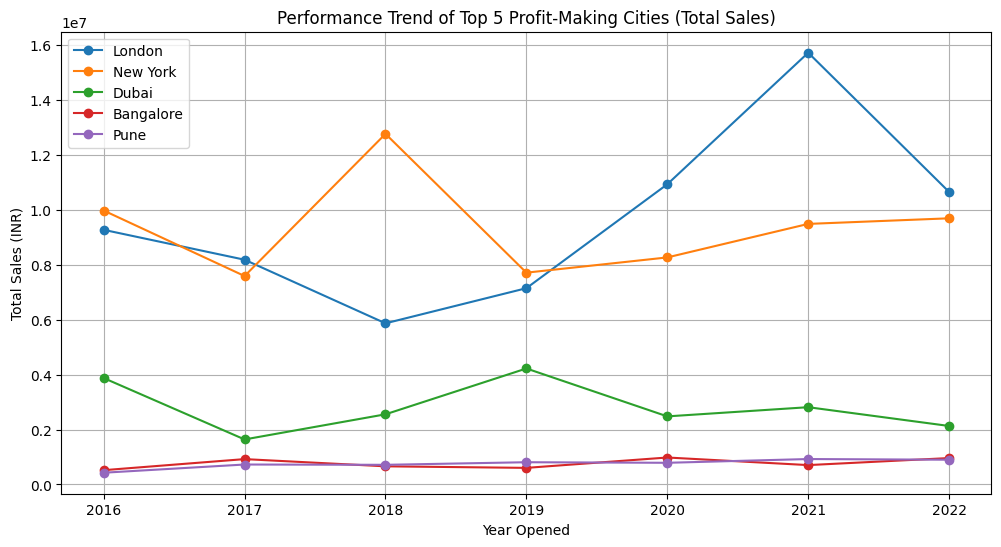

In [27]:
import matplotlib.pyplot as plt

# Step 1: Find top 5 profit-making cities
city_summary = df.groupby('City').agg({'Total_Sales (INR)': 'sum'}).reset_index()
top_5_cities = city_summary.sort_values(by='Total_Sales (INR)', ascending=False).head(5)['City'].tolist()

# Step 2: Filter dataset for top 5 cities
top_cities_df = df[df['City'].isin(top_5_cities)]

# Step 3: Aggregate sales per city per year
trend_df = top_cities_df.groupby(['City', 'Year_Opened']).agg({
    'Total_Sales (INR)': 'sum',
    'Revenue_Growth_Percentage (Yearly)': 'mean',   # optional
    'Franchise_Margin_Percentage': 'mean'           # optional
}).reset_index()

# Step 4: Plot Total Sales trend for top 5 cities
plt.figure(figsize=(12,6))

for city in top_5_cities:
    city_data = trend_df[trend_df['City'] == city]
    plt.plot(city_data['Year_Opened'], city_data['Total_Sales (INR)'], marker='o', label=city)

plt.title("Performance Trend of Top 5 Profit-Making Cities (Total Sales)")
plt.xlabel("Year Opened")
plt.ylabel("Total Sales (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [30]:


# We want low sales, low revenue, high employees -> negative impact
columns_for_scoring = [
    'Total_Sales (INR)', 
    'Daily_Sales_Units',
    'Franchise_Margin_Percentage',
    'Revenue_Growth_Percentage (Yearly)',
    'Total_Employees'
]

# Step 3: Normalize metrics (0-1 scale)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Sales_Norm', 'Units_Norm', 'Margin_Norm', 'Growth_Norm', 'Employees_Norm']] = scaler.fit_transform(
    df_scaled[columns_for_scoring]
)

# Step 4: Calculate Performance Score
# Low sales, low margin, low growth = worse (use inverse)
# High employees = worse (adds to score)
df_scaled['Performance_Score'] = (
    (1 - df_scaled['Sales_Norm']) * 0.3 + 
    (1 - df_scaled['Units_Norm']) * 0.2 +
    (1 - df_scaled['Margin_Norm']) * 0.2 +
    (1 - df_scaled['Growth_Norm']) * 0.2 +
    df_scaled['Employees_Norm'] * 0.1
)

# Step 5: Sort by Performance Score descending (highest = worst)
worst_franchises = df_scaled.sort_values(by='Performance_Score', ascending=False).head(10)

# Step 6: Display relevant info
print(worst_franchises[['Franchise_ID','City','Product_Category','Total_Sales (INR)',
                        'Daily_Sales_Units','Franchise_Margin_Percentage',
                        'Revenue_Growth_Percentage (Yearly)','Total_Employees']])


                              Franchise_ID       City Product_Category  \
1164  0e3137eb-689b-4909-856b-4b5545e1aa22     Mumbai     Other Snacks   
955   1a6aab2d-5a60-4a3d-880c-a05518ba09d7     Bhopal     Other Snacks   
929   d7d826f5-9c0a-44fd-9b04-5ed59d726785     Ujjain   Chocolate Chai   
871   79a59253-652b-4f66-97ca-839cb3c793ff  Bangalore     Other Snacks   
148   7eee9e57-7484-457c-a0b4-c1d70d930f58    Kolkata        Mint Chai   
1424  c4ba63fb-22c9-4e43-b686-456261bde24d     Indore           Coffee   
497   f3931318-f577-4815-bec9-09807e0e1401    Kolkata        Mint Chai   
1597  a4f8440a-679a-422d-944b-2c3f752274df     Ujjain   Chocolate Chai   
185   fc041bd2-2509-4e7c-a297-1343f14a47bc   New York     Other Snacks   
646   3f2758fb-8038-4b73-b332-3ed4e18efa12      Dubai     Other Snacks   

      Total_Sales (INR)  Daily_Sales_Units  Franchise_Margin_Percentage  \
1164           23709.78                640                        21.33   
955            11146.68            

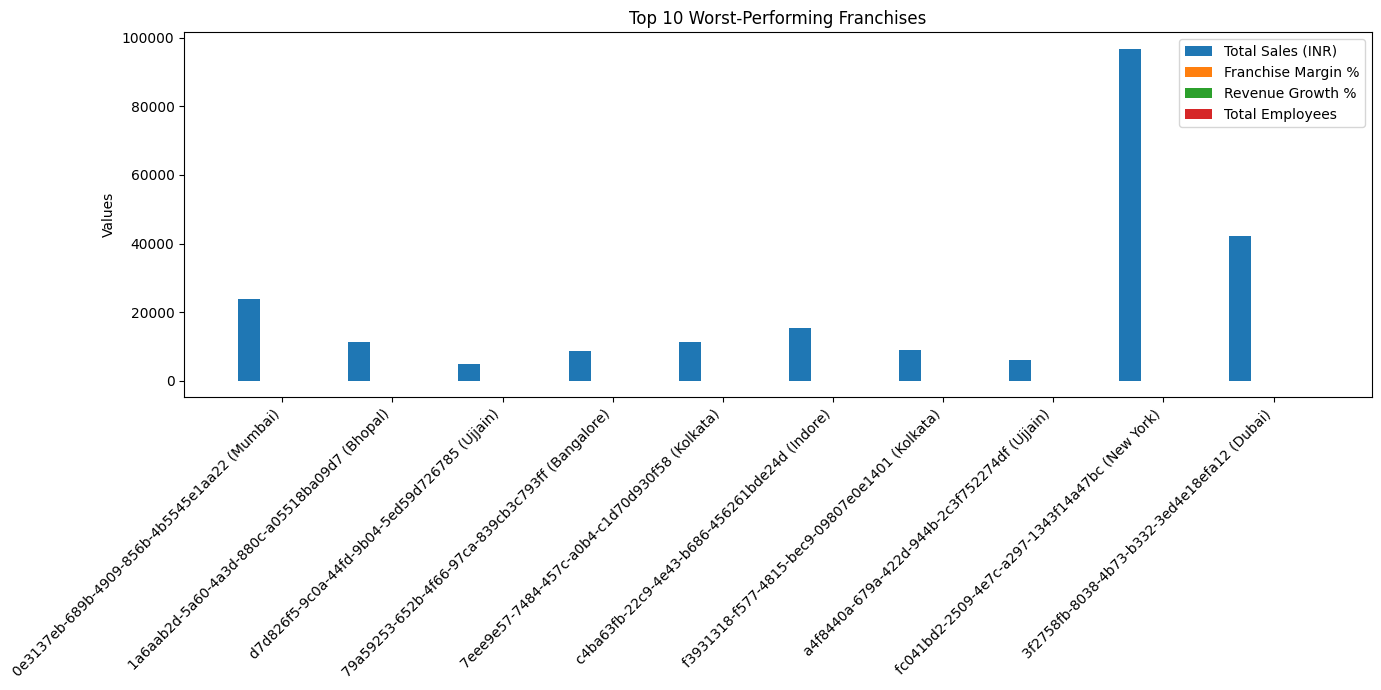

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming worst_franchises is already created from previous code

# Select top 10 worst franchises
top_worst = worst_franchises.head(10)

# Set figure size
plt.figure(figsize=(14,7))

# X positions
x = range(len(top_worst))
width = 0.2  # width of each bar

# Plot bars
plt.bar([p - width*1.5 for p in x], top_worst['Total_Sales (INR)'], width=width, label='Total Sales (INR)')
plt.bar([p - width/2 for p in x], top_worst['Franchise_Margin_Percentage'], width=width, label='Franchise Margin %')
plt.bar([p + width/2 for p in x], top_worst['Revenue_Growth_Percentage (Yearly)'], width=width, label='Revenue Growth %')
plt.bar([p + width*1.5 for p in x], top_worst['Total_Employees'], width=width, label='Total Employees')

# Labels and title
plt.xticks(x, top_worst['Franchise_ID'] + " (" + top_worst['City'] + ")", rotation=45, ha='right')
plt.ylabel('Values')
plt.title('Top 10 Worst-Performing Franchises')
plt.legend()
plt.tight_layout()
plt.show()


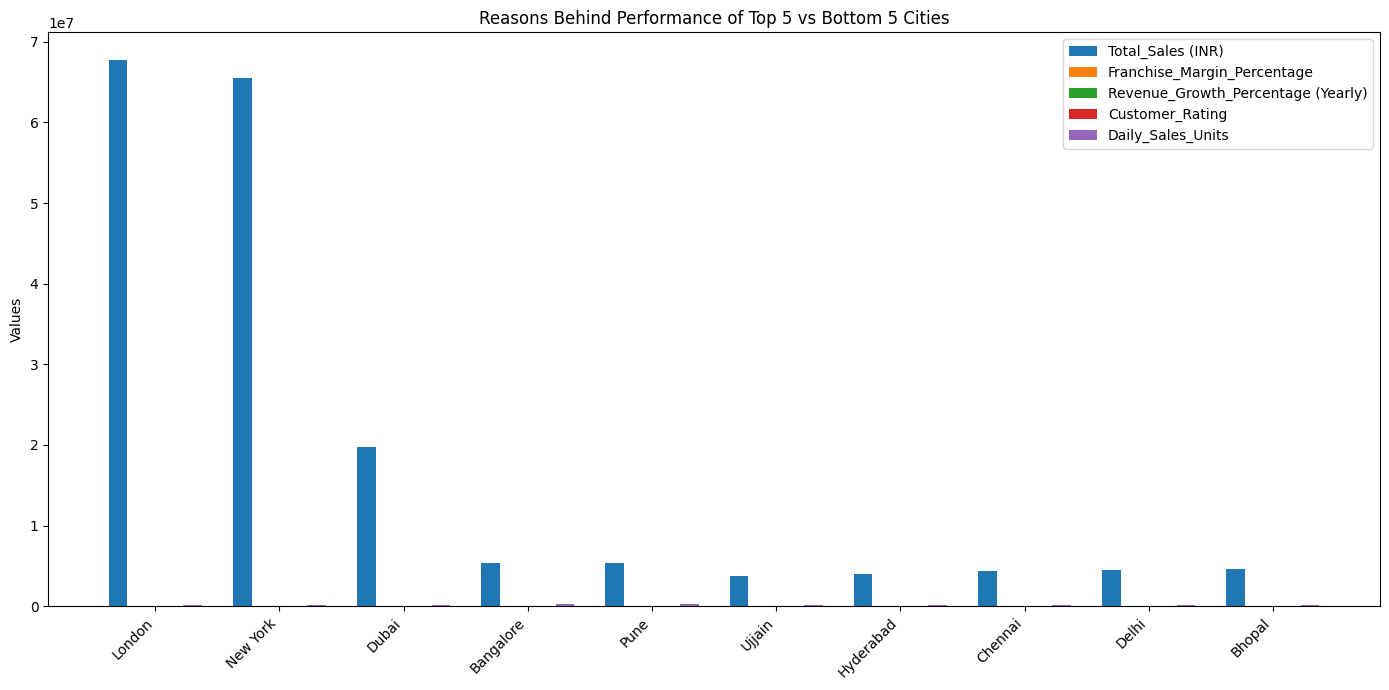

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Aggregate key metrics by city
city_metrics = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum',
    'Franchise_Margin_Percentage': 'mean',
    'Revenue_Growth_Percentage (Yearly)': 'mean',
    'Customer_Rating': 'mean',
    'Daily_Sales_Units': 'sum',
    'Total_Employees': 'mean'
}).reset_index()

# Step 2: Identify top 5 and bottom 5 cities based on Total Sales
top_5_cities = city_metrics.sort_values(by='Total_Sales (INR)', ascending=False).head(5)
bottom_5_cities = city_metrics.sort_values(by='Total_Sales (INR)', ascending=True).head(5)

# Step 3: Combine top and bottom for comparison
comparison_cities = pd.concat([top_5_cities, bottom_5_cities], ignore_index=True)

# Step 4: Plot grouped bar chart
metrics_to_plot = ['Total_Sales (INR)', 'Franchise_Margin_Percentage', 
                   'Revenue_Growth_Percentage (Yearly)', 'Customer_Rating', 'Daily_Sales_Units']

plt.figure(figsize=(14,7))
x = range(len(comparison_cities))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.bar([p + width*i for p in x], comparison_cities[metric], width=width, label=metric)

# X-axis labels
plt.xticks([p + width*2 for p in x], comparison_cities['City'], rotation=45, ha='right')
plt.ylabel('Values')
plt.title('Reasons Behind Performance of Top 5 vs Bottom 5 Cities')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#key metrics Total Sales (INR) – overall business

Franchise_Margin_Percentage – profit margin

Revenue_Growth_Percentage (Yearly) – growth trend

Customer_Rating – satisfaction

Daily_Sales_Units – operational efficiency

Total_Employees – staffing efficiency

In [ ]:
#to improve sales focus on this metrics
Low Total Sales / Daily Sales Units → Low footfall, poor marketing, wrong pricing.

Low Customer Rating → Poor service, product quality issues, untrained staff.

High Number of Employees with low sales → Overstaffing, inefficient operations.

Low Margin / Negative Revenue Growth → High cost of operations, poor product mix, low repeat business.

Poor Product Category Performance → Some products may not sell well in certain cities.

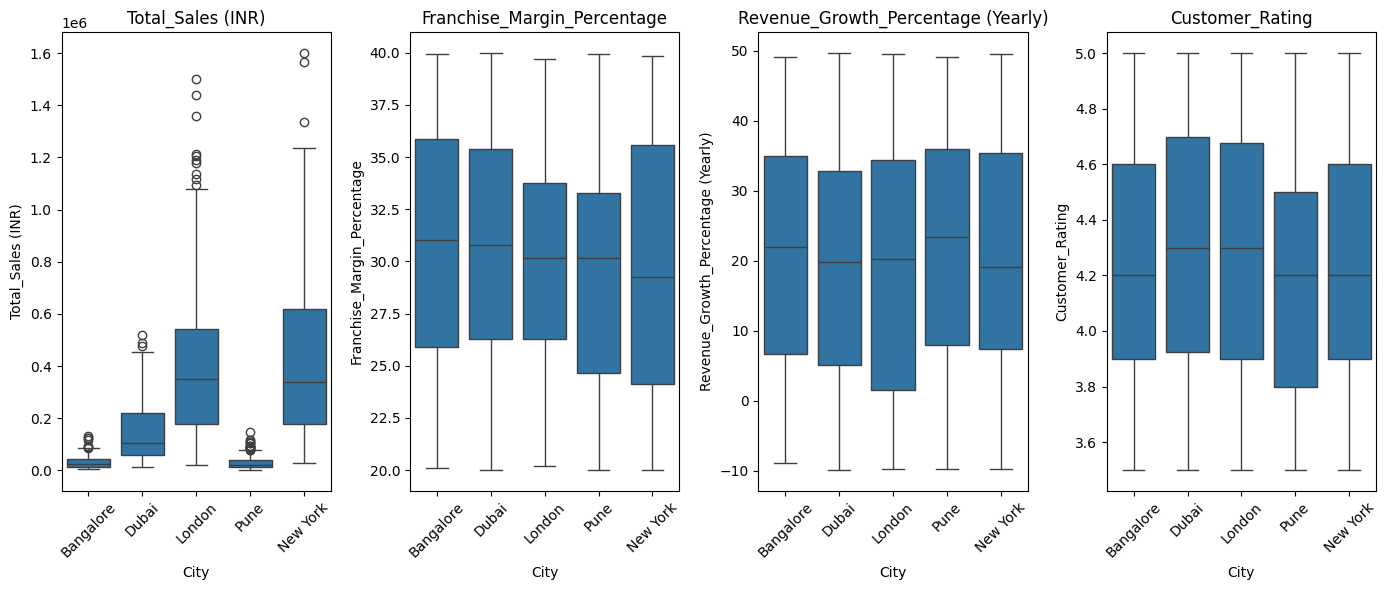

In [38]:
# Step 1: Aggregate total sales per city to get top 5 performing cities
city_summary = df.groupby('City').agg({
    'Total_Sales (INR)': 'sum'
}).reset_index()

top_5_cities = city_summary.sort_values(by='Total_Sales (INR)', ascending=False).head(5)['City'].tolist()

# Step 2: Filter dataset for top 5 cities
top_cities_df = df[df['City'].isin(top_5_cities)]

# Step 3: Create boxplots for key performance metrics
plt.figure(figsize=(14,6))

metrics = ['Total_Sales (INR)', 'Franchise_Margin_Percentage', 'Revenue_Growth_Percentage (Yearly)', 'Customer_Rating']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, len(metrics), i)
    sns.boxplot(x='City', y=metric, data=top_cities_df)
    plt.title(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
from scipy.stats import pearsonr, spearmanr

# Example: correlation between Total Sales and Customer Rating
corr, p_value = pearsonr(df['Total_Sales (INR)'], df['Customer_Rating'])
print(f"Pearson Correlation: {corr}, p-value: {p_value}")


Pearson Correlation: -0.01474328017971984, p-value: 0.5099194382144405


In [40]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# Step 1: Remove outliers using Z-score
df['Sales_Z'] = zscore(df['Total_Sales (INR)'])
df_no_outliers = df[(df['Sales_Z'] > -3) & (df['Sales_Z'] < 3)]

# Step 2: Normalize Total Sales (Min-Max scaling)
scaler = MinMaxScaler()
df_no_outliers['Total_Sales_Norm'] = scaler.fit_transform(df_no_outliers[['Total_Sales (INR)']])

# Step 3: Correlation between normalized Total Sales and Customer Rating
corr, p_value = pearsonr(df_no_outliers['Total_Sales_Norm'], df_no_outliers['Customer_Rating'])

print(f"Pearson Correlation (without outliers & normalized): {corr:.3f}, p-value: {p_value:.3f}")


Pearson Correlation (without outliers & normalized): 0.009, p-value: 0.706


C:\Users\mary p seby\AppData\Local\Temp\ipykernel_11640\3039979772.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Total_Sales_Norm'] = scaler.fit_transform(df_no_outliers[['Total_Sales (INR)']])


In [42]:
import pandas as pd
from scipy.stats import pearsonr, zscore
from sklearn.preprocessing import MinMaxScaler


# Step 1: Remove outliers in Total Sales using Z-score
df['Sales_Z'] = zscore(df['Total_Sales (INR)'])
df_no_outliers = df[(df['Sales_Z'] > -3) & (df['Sales_Z'] < 3)].copy()

# Step 2: Normalize Total Sales and Customer Rating using Min-Max
scaler = MinMaxScaler()
df_no_outliers[['Total_Sales_Norm', 'Customer_Rating_Norm']] = scaler.fit_transform(
    df_no_outliers[['Total_Sales (INR)', 'Customer_Rating']]
)

#  Pearson correlation between normalized metrics
corr, p_value = pearsonr(df_no_outliers['Total_Sales_Norm'], df_no_outliers['Customer_Rating_Norm'])

print(f"Pearson Correlation (without outliers & normalized): {corr:.3f}, p-value: {p_value:.3f}")

# Check first few rows
print(df_no_outliers[['Total_Sales (INR)', 'Total_Sales_Norm', 
                      'Customer_Rating', 'Customer_Rating_Norm']].head())


Pearson Correlation (without outliers & normalized): 0.009, p-value: 0.706
      Total_Sales (INR)  Total_Sales_Norm  Customer_Rating  \
1729            8088.32          0.009566              4.0   
331            22056.37          0.029787              4.0   
327            22053.06          0.029782              4.1   
322            30336.32          0.041774              4.3   
1719          215872.79          0.310366              4.9   

      Customer_Rating_Norm  
1729              0.333333  
331               0.333333  
327               0.400000  
322               0.533333  
1719              0.933333  


In [ ]:
#no relation between Total_Sales (INR) and  Customer_Rating_Norm 


In [43]:
from scipy.stats import f_oneway

# Example: compare Total Sales across top 3 cities
top_cities = df[df['City'].isin(top_5_cities)]
groups = [top_cities[top_cities['City'] == city]['Total_Sales (INR)'] for city in top_5_cities]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")


F-statistic: 140.6166399075903, p-value: 2.7446439148200594e-90


In [47]:
import pandas as pd
from scipy.stats import zscore, f_oneway
from sklearn.preprocessing import MinMaxScaler


# Step 1: Identify top 5 cities based on Total Sales
city_summary = df.groupby('City')['Total_Sales (INR)'].sum().reset_index()
top_5_cities = city_summary.sort_values(by='Total_Sales (INR)', ascending=False).head(5)['City'].tolist()

# Step 2: Filter dataset for top 5 cities
top_cities_df = df[df['City'].isin(top_5_cities)].copy()

# Step 3: Remove outliers from Total Sales using Z-score
top_cities_df['Sales_Z'] = zscore(top_cities_df['Total_Sales (INR)'])
top_cities_no_outliers = top_cities_df[(top_cities_df['Sales_Z'] > -3) & (top_cities_df['Sales_Z'] < 3)].copy()

# Step 4: Normalize Total Sales (0–1) for comparison
scaler = MinMaxScaler()
top_cities_no_outliers['Total_Sales_Norm'] = scaler.fit_transform(top_cities_no_outliers[['Total_Sales (INR)']])

# Step 5: Prepare groups for ANOVA (using normalized sales)
groups = [top_cities_no_outliers[top_cities_no_outliers['City'] == city]['Total_Sales_Norm'] for city in top_5_cities]

# Step 6: Run ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")
print('Total Sales are significantly different across top 5 cities.')

ANOVA F-statistic: 164.601, p-value: 0.000
Total Sales are significantly different across top 5 cities.


In [52]:
#Outlier detection Identify top/bottom franchises
from scipy.stats import zscore
df['Sales_Z'] = zscore(df['Total_Sales (INR)'])
outliers = df[df['Sales_Z'] > 3]  # top outliers
outliers

,Franchise_ID,City,Year_Opened,Product_Category,Daily_Sales_Units,Total_Sales (INR),Total_Customers_Served,Customer_Visits (Daily),Customer_Rating,Outlet_Manager,Total_Employees,Global_Presence,Franchise_Margin_Percentage,Revenue_Growth_Percentage (Yearly),Weekend_Sales (INR),Sales_Z,Customer_Rating_Norm
1138,8f76e047-57ce-470a-baef-ec6103b10c90,New York,2016,Kulhad Chai,3054,1040138.44,3182,2974,4.7,Anirudh Jain,30,International,20.93,23.13,1256997.10,4.739669,0.800000
1932,c6692d74-a726-427a-8cf4-affa2dd734a6,New York,2016,Coffee,1267,844214.70,1482,276,4.1,Krishna Bassi,12,International,33.96,2.35,998132.64,3.752283,0.400000
1269,f2ec38dc-01a6-40dc-9330-e23cdbe435d2,London,2016,Masala Chai,2694,964767.79,2799,2064,3.6,Chaitaly Cheema,10,International,35.14,33.12,1205545.19,4.359827,0.066667
1895,90e14163-dd3b-4aa0-a979-cd41e2809ecb,London,2016,Masala Chai,3334,1358786.29,3385,2620,3.5,Kalpit Loke,27,International,30.46,28.63,1566502.90,6.345540,0.000000
1427,b93e136b-9b2c-41f6-872c-a188694bc3cc,London,2016,Masala Chai,3222,1093032.05,3442,846,4.2,Nidhi Kapoor,30,International,39.21,14.82,1361696.05,5.006234,0.466667
197,9c9f5291-1e2b-4a62-b28e-5b5b1b6c5ae6,London,2016,Kulhad Chai,3924,807256.73,4196,996,4.2,Jonathan Prabhu,20,International,27.15,25.44,946511.22,3.566028,0.466667
533,427fb475-a3e2-4d1c-afb6-4b6eeb5ae459,New York,2016,Kulhad Chai,1882,935974.81,2040,693,5.0,Faris Dara,8,International,38.18,45.20,1166964.13,4.214721,1.000000
1688,c2bc6c8f-572c-4711-a49a-a258bb804cbe,New York,2016,Kulhad Chai,3123,943497.92,3259,349,4.0,Banjeet Sampath,15,International,35.99,20.52,1124137.47,4.252635,0.333333
1777,5b2668c6-f66a-4550-8784-8a99905c3aec,New York,2017,Masala Chai,3381,890205.01,3609,3185,4.6,Rachita Shukla,30,International,33.56,27.21,1051430.80,3.984057,0.733333
1870,c39862f1-ce81-4347-b6b5-5fff0fecd473,London,2017,Coffee,1024,781553.65,1228,667,4.1,Saumya Kohli,27,International,25.07,20.93,911656.77,3.436493,0.400000


In [57]:
from scipy.stats import chi2_contingency

# Create contingency table
table = pd.crosstab(df['Product_Category'], df['Revenue_Growth_Percentage (Yearly)'] > df['Revenue_Growth_Percentage (Yearly)'].median())
chi2, p, dof, ex = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 6.751757094304632, p-value: 0.45517647327860844


In [ ]:
#There is no statistically significant association between the two categorical variables tested.

In [58]:
import statsmodels.api as sm

X = df[['Franchise_Margin_Percentage',
        'Revenue_Growth_Percentage (Yearly)',
        'Customer_Rating']]

X = sm.add_constant(X)
y = df['Total_Sales (INR)']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Total_Sales (INR)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2127
Date:                Fri, 02 Jan 2026   Prob (F-statistic):              0.888
Time:                        17:43:12   Log-Likelihood:                -27234.
No. Observations:                2000   AIC:                         5.448e+04
Df Residuals:                    1996   BIC:                         5.450e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons